In [3]:
from toolkit.utils import read_data_new, display_analysis

## Introduction

This experiment is the first phase of our endevour to optimize the frontend of the race.
This optimization effort is done in a situation in which maximizing will hurt us on others.
(_e.g._, increasing frequency in most cases will favor the split time on one hand,
and would hurt the DPS as well as the physical condition of the swimmer). 

## About the results

Our experiment is consisted of 4-5 time of pairs of $25m$ interval, in linearily increasing cycle frequency.
The $X$ axis is the frequency (mesearued in cycles/minute),
the $Y$ axis represents the Distance-per-stroke (DPS), whereas the $Z$ axis is the measured time.

The experiment was done in a standard SCM pool.

## Tzuf (Fly)

,Swimmer Name,uw distance,uw time,Time,Num strokes,Cycle time,Freq,DPS,Speed
17,Tzuf,11.0,5.70,15.71,8.0,1.251250,47.952048,1.750000,1.398601
16,Tzuf,11.0,5.25,15.60,8.0,1.293750,46.376812,1.750000,1.352657
15,Tzuf,11.0,6.00,16.80,9.0,1.200000,50.000000,1.555556,1.296296
19,Tzuf,10.8,5.38,16.53,9.0,1.238889,48.430493,1.577778,1.273543
18,Tzuf,10.8,5.25,16.45,8.0,1.400000,42.857143,1.775000,1.267857


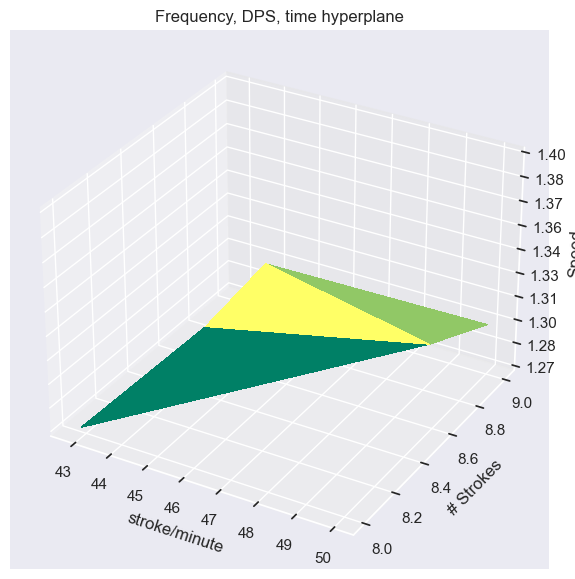

,Freq,Num strokes
Freq,1.000000,0.704056
Num strokes,0.704056,1.000000


,Num strokes,Time
Num strokes,1.000000,0.767769
Time,0.767769,1.000000


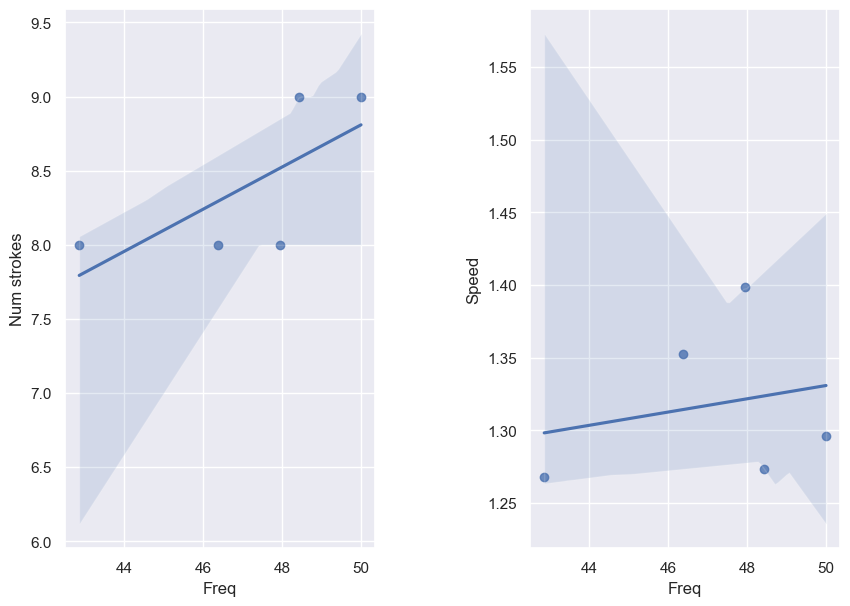

In [4]:
display_analysis(read_data_new("_data/raw-data-new.xlsx", "Tzuf"))

# Insights

1. DPS is great (same as last time), all the way untill frequency $\ge 48$, then it **tumbles** - Let's work on that!
1. I love the steep derivative along the frequency-speed axis, all the way from $f=38 \rightarrow 48$.
1. Given Tzuf's underwater RT, uw performance, I added a table below, predicting Tzuf's 100 fly times, given that we maintain a DPS of $1.72 \frac{m}{stroke}$.

In [34]:
import numpy as np


def calc_tzuf(freq: float) -> float:
    dps = 1.72
    speed_sec = (dps * freq) / 60
    uw1_d, uw2_d = 15, 8
    uw1_t, uw2_t = 5.6, 4.9
    t1, t2 = uw1_t + (50-uw1_d)/speed_sec, uw2_t + (50-uw2_d)/speed_sec
    return [np.round(t, 2) for t in [t1, t2, t1+t2]]

In [36]:
import pandas as pd


columns = ["Frquency (cycles/min)", "Lap1 (sec)", "Lap2 (sec)", "Total (sec)"]
mat = np.array([[f, *calc_tzuf(f)] for f in [49.0+(0.5*i) for i in range(6)]])
df_pred = pd.DataFrame(data=mat, columns=columns)
display(df_pred)

,Frquency (cycles/min),Lap1 (sec),Lap2 (sec),Total (sec)
0,49.0,30.52,34.80,65.32
1,49.5,30.27,34.50,64.76
2,50.0,30.02,34.20,64.22
3,50.5,29.78,33.91,63.69
4,51.0,29.54,33.63,63.17
5,51.5,29.31,33.35,62.66
